Test de Dickey-Fuller Augmenté (ADF):
Statistique ADF : -3.4357912919040183
p-valeur : 0.009797604193949897
Valeurs critiques :
1%%: -3.452867117291862 
5%%: -2.8714554160827745 
10%%: -2.5720532321867466 


Test Statistique KPSS: 0.32257201497630156
Valeur p : 0.1
Lags utilisés : 7
La série est stationnaire. 



/var/folders/gr/j2w8m1td1xx2mw6812lwhmf00000gn/T/ipykernel_3205/633290013.py:58: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  resultat = kpss(daily_data['nombre_appels'])


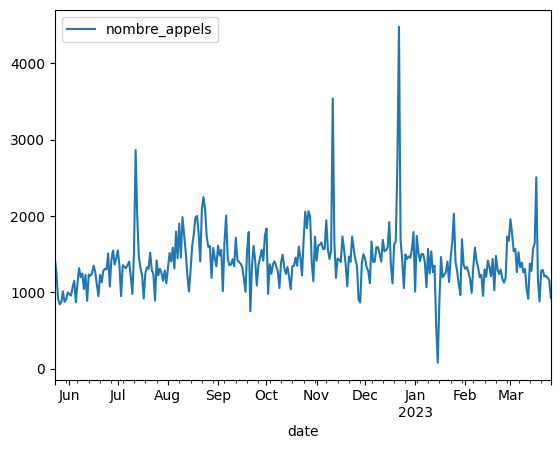

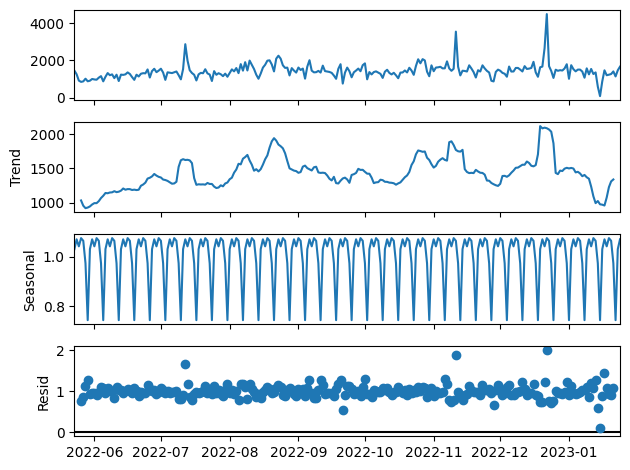

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error,r2_score

import pandas as pd
import numpy as np, warnings, itertools
import seaborn as sns

# Charger le fichier CSV
df = pd.read_csv("priori.csv")

# get datetime and calls volume
df_data = df[['date','nombre_appels']].copy()

# convert to datetime
df_data['date'] = pd.to_datetime(df_data['date'])


# set index
df_data.set_index('date', inplace=True)

# Agréger les données par jour
daily_data = df_data.resample('D').sum()  # Somme des appels par jour

daily_data.plot()

daily_data_send = daily_data.to_csv('appels_journaliers.csv', index = True)

# Afficher les 5 premières lignes des données agrégées
""" print(daily_data.head(5))
print(daily_data.tail(5)) """


# Effectuer le test de Dickey-Fuller augmenté
result = adfuller(daily_data['nombre_appels'])



# Extraire les statistiques du test
statistic = result[0]
p_value = result[1]
critical_values = result[4]

# Afficher les résultats
print("Test de Dickey-Fuller Augmenté (ADF):")
print(f"Statistique ADF : {statistic}")
print(f"p-valeur : {p_value}")
print("Valeurs critiques :")
for key, value in critical_values.items():
    print(f"{key}%: {value} ")

print("\n")

resultat = kpss(daily_data['nombre_appels'])

# Afficher les résultats
print('Test Statistique KPSS:', resultat[0])
print('Valeur p :', resultat[1])
print('Lags utilisés :', resultat[2])

# Interprétation des résultats
if resultat[1] < 0.05:
    print('La série est non stationnaire.')
else:
    print('La série est stationnaire. \n')


split = int(len(daily_data)*0.2)
train = daily_data[:-split]  # Utilisez la plupart des données pour l'entraînement
test = daily_data[-split:]

""" print(test) """


# Décomposition
decomposition = seasonal_decompose(train, model='multiplicative')

# Affichage des composantes
decomposition.plot()
plt.show()

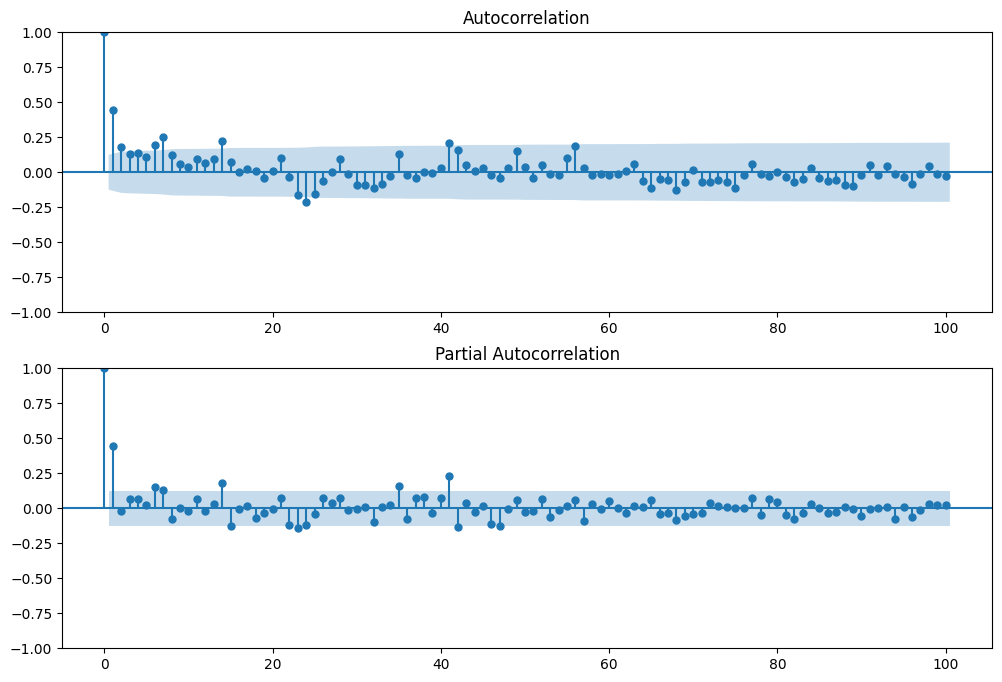

In [2]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
#plot the ACF
fig = sm.graphics.tsa.plot_acf(train, lags=100, ax=ax1)
ax2 = fig.add_subplot(212)
#plot the PACF
fig = sm.graphics.tsa.plot_pacf(train, lags=100, ax=ax2)



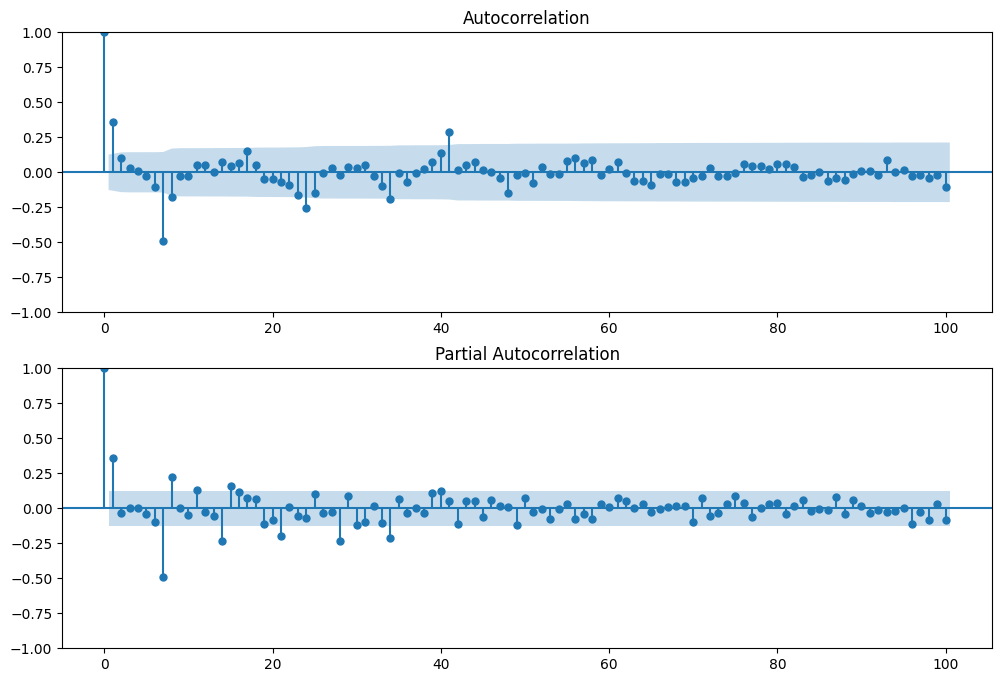

In [3]:
# Différenciation saisonnière des données
seasonal_diff_data = train.diff(7).dropna()

# Tracer les graphiques ACF et PACF des différences saisonnières


fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
#plot the ACF
fig = sm.graphics.tsa.plot_acf(seasonal_diff_data, lags=100, ax=ax1)
ax2 = fig.add_subplot(212)
#plot the PACF
fig = sm.graphics.tsa.plot_pacf(seasonal_diff_data, lags=100, ax=ax2)


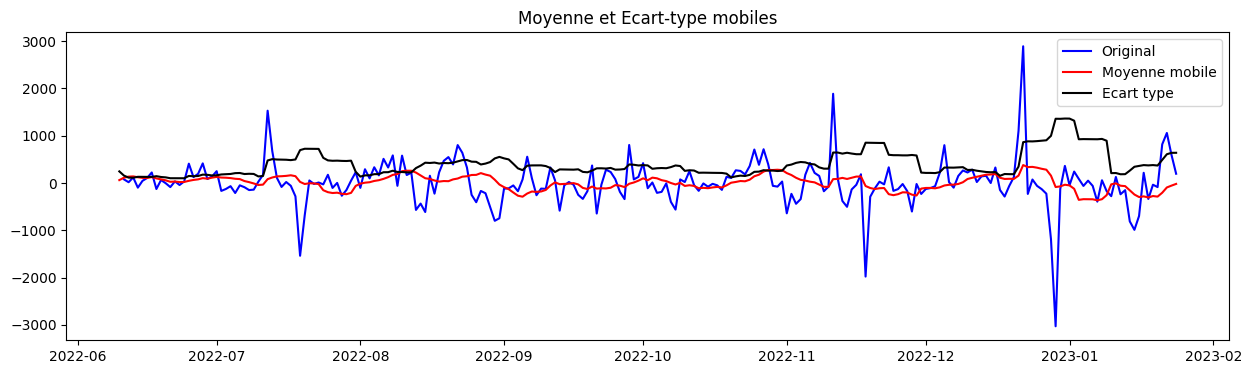

Test de Dickey-Fuller :
Test Statistic                  -3.673853
p-value                          0.004496
#Lags Used                      15.000000
Number of Observations Used    224.000000
Critical Value (1%)             -3.459885
Critical Value (5%)             -2.874531
Critical Value (10%)            -2.573694
dtype: float64
KPSS Statistic: 0.053396
Critical Values @ 0.05: 0.46
p-value: 0.100000
None


/var/folders/gr/j2w8m1td1xx2mw6812lwhmf00000gn/T/ipykernel_3205/4270443611.py:29: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(timeseries)


In [4]:
from statsmodels.tsa.stattools import kpss


def test_stationarity(timeseries, window):
    
    # statistics moyenne
    rolmean = timeseries.rolling(window=window).mean()
    rolstd = timeseries.rolling(window=window).std()

    #Plot moyenne statistics:
    fig = plt.figure(figsize=(15, 4))
    orig = plt.plot(timeseries.iloc[window:], color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Moyenne mobile')
    std = plt.plot(rolstd, color='black', label = 'Ecart type')
    plt.legend(loc='best')
    plt.title('Moyenne et Ecart-type mobiles')
    plt.show()
    
    #Test Dickey-Fuller:
    print ('Test de Dickey-Fuller :')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

    #Test kpss: 

    kpss_test = kpss(timeseries)

    print('KPSS Statistic: %f' % kpss_test[0])
    print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
    print('p-value: %f' % kpss_test[1])


print(test_stationarity(seasonal_diff_data, 12))

In [5]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import product
from tqdm import tqdm_notebook

#pdq
#autocorellation MA = q 
#partialautocorellation AR = p 

ps = range(0, 3)
qs = range(0, 3)

""" p = 1
""" 
d = 1  

"""
q = 1 """

Ps = range(0, 3)
Qs = range(0, 3)

""" P = 0 """
D = 1 
""" Q = 1 """
s = 7

parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)




def Sarima(series, parameters_list, d, D, s, opt_method='powell'):
    
    results = []
    models = {}
    best_aic = float("inf")
    print("1")
    for param in parameters_list:
        # Combinaison
        try:
            model = sm.tsa.statespace.SARIMAX(
                series, 
                order=(param[0], d, param[1]), 
                seasonal_order=(param[2], D, param[3], s)).fit(method=opt_method, disp=False)
        except:
            continue

        aic = model.aic
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])

    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'aic']
    result_table = result_table.sort_values(by='aic', ascending=True).reset_index(drop=True)
    
    return result_table, best_model


result_table, best_model = Sarima(train, parameters_list, d, D, s)

print(result_table.head(10))





print('value')
print(best_model.summary())




1


/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/site-packages/st

     parameters          aic
0  (1, 1, 0, 1)  3464.014886
1  (0, 2, 0, 1)  3464.826180
2  (1, 1, 0, 2)  3465.282395
3  (1, 1, 1, 1)  3465.286889
4  (0, 2, 1, 1)  3465.464282
5  (0, 2, 0, 2)  3465.547063
6  (2, 1, 0, 1)  3465.599175
7  (1, 2, 0, 1)  3466.286917
8  (2, 1, 0, 2)  3466.651387
9  (2, 1, 1, 1)  3466.669723
value
                                     SARIMAX Results                                     
Dep. Variable:                     nombre_appels   No. Observations:                  247
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 7)   Log Likelihood               -1728.007
Date:                           Wed, 07 Jun 2023   AIC                           3464.015
Time:                                   13:29:23   BIC                           3477.921
Sample:                               05-23-2022   HQIC                          3469.619
                                    - 01-24-2023                                         
Covariance Type:                             

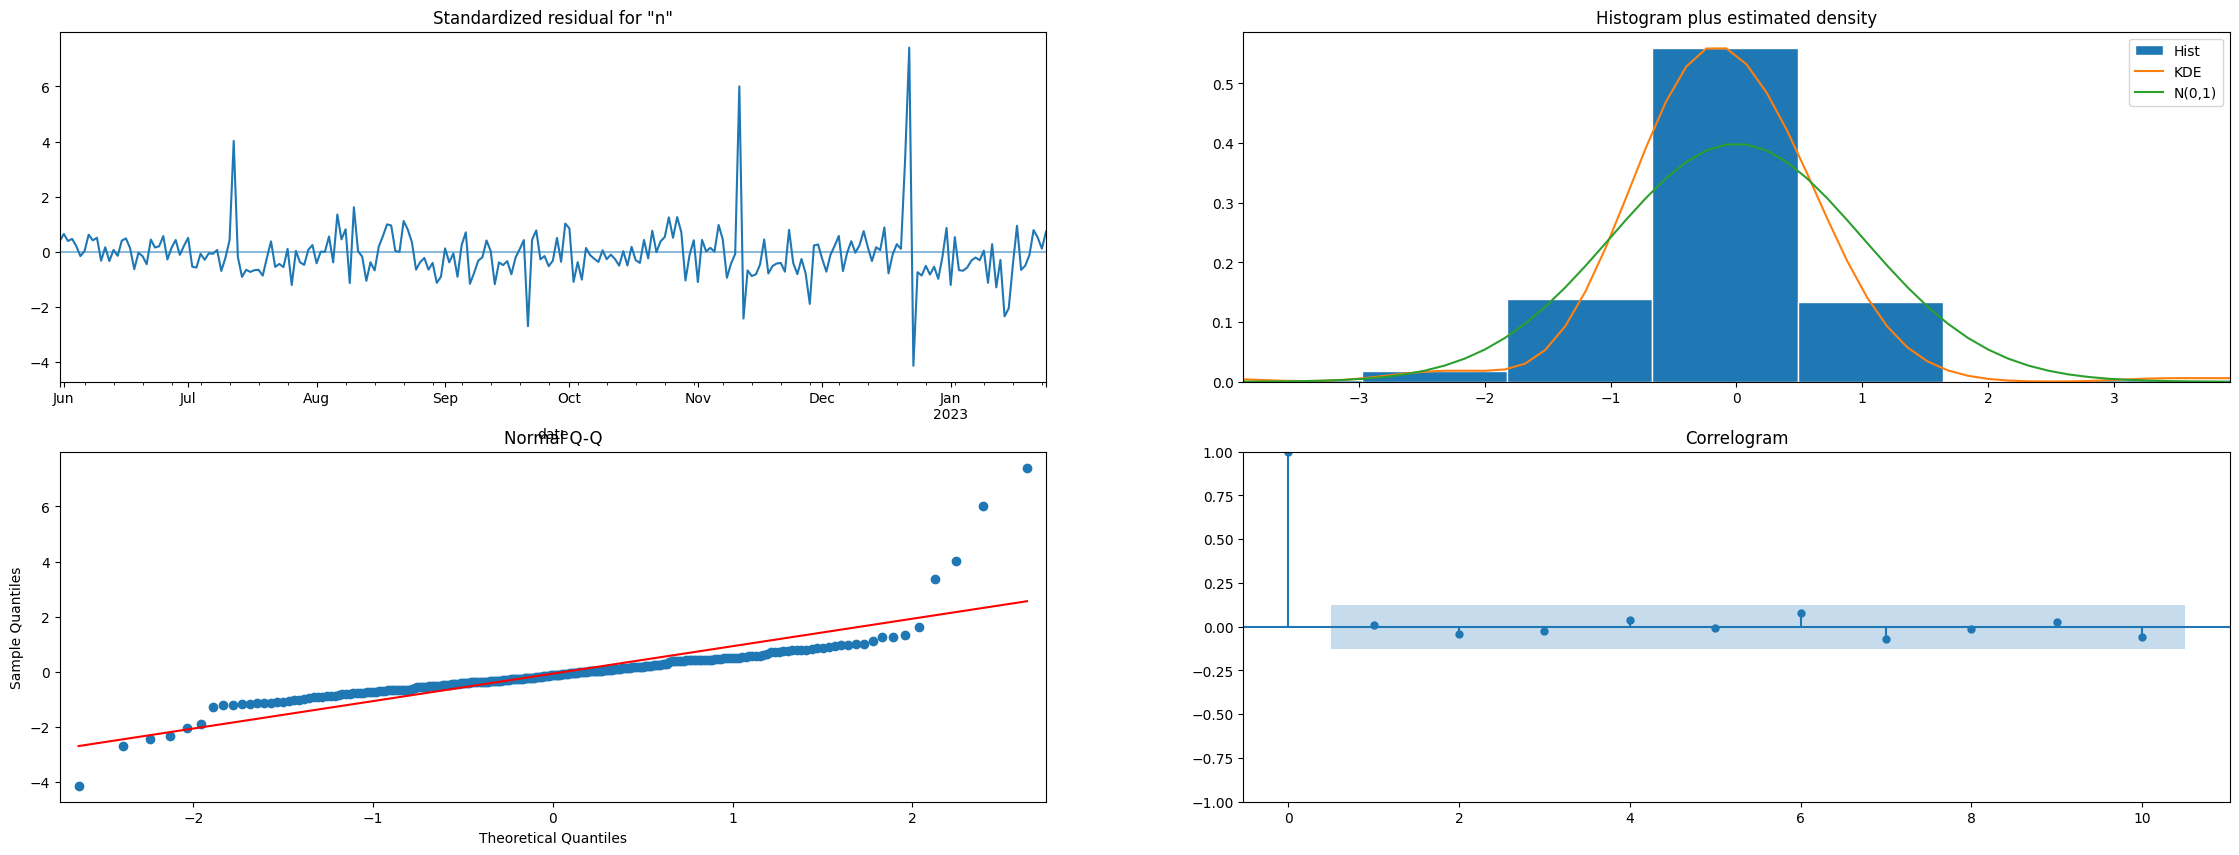

In [6]:
best_model.plot_diagnostics(figsize=(28,10))
plt.show()

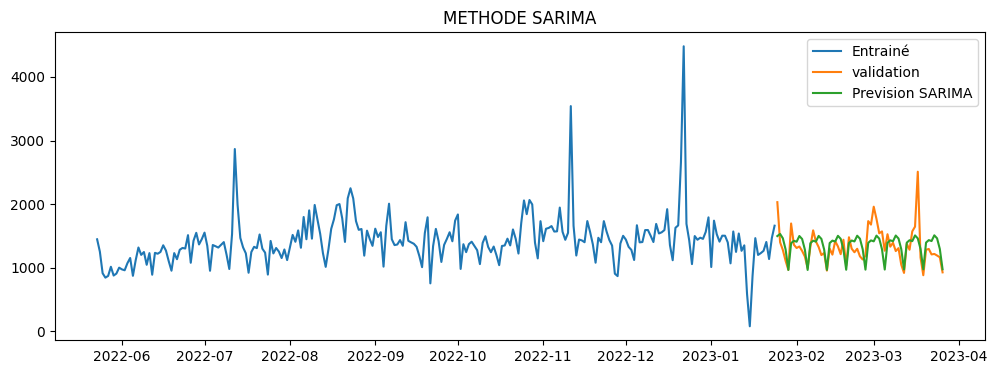

            Method    RMSE          MSE         MAE  MAPE  R-square
0  (SARIMA) method  237.36  56341.57407  177.819426  0.13  0.276235


' # Prédire les valeurs pour les prochaines 7 périodes\nforecast = result.get_forecast(steps=7)\n\n# Extraire les valeurs prédites\npredicted_values = forecast.predicted_mean\n\n# Afficher les valeurs prédites\nprint(predicted_values) '

In [7]:
pred = best_model.predict(start=test["nombre_appels"].index[0], end=test["nombre_appels"].index[-1])


plt.figure(figsize=(12,4))
plt.plot(train, label='Entrainé')
plt.plot(test["nombre_appels"], label='validation')
plt.plot(pred, label='Prevision SARIMA')
plt.legend(loc='best')
plt.title('METHODE SARIMA')
plt.show()

""" best_model.plot_diagnostics(figsize=(20,10))
plt.show() """

rmse = np.sqrt(mean_squared_error(test["nombre_appels"], pred)).round(2)
mse = mean_squared_error(test["nombre_appels"], pred)
mae = abs(test["nombre_appels"] - pred).mean()
mape = np.round(np.mean(np.abs(test["nombre_appels"]-pred)/test["nombre_appels"]),2)
r_sq = r2_score(test["nombre_appels"],pred)


tempResults = pd.DataFrame({'Method':['(SARIMA) method'], 'RMSE': [rmse], 'MSE': [mse], 'MAE': [mae], 'MAPE': [mape], 'R-square': r_sq })
results = pd.concat([tempResults])
results = results[['Method', 'RMSE', 'MSE', 'MAE', 'MAPE', 'R-square']]
results


print(results)


""" print(f'SARIMA MSE: {mse}')

print(f'SARIMA mean error: {}') """
""" print(f'SARIMA max error: {abs(test["nombre_appels"] - pred).max()}')
print(f'SARIMA min error: {abs(test["nombre_appels"] - pred).min()}') """





""" # Prédire les valeurs pour les prochaines 7 périodes
forecast = result.get_forecast(steps=7)

# Extraire les valeurs prédites
predicted_values = forecast.predicted_mean

# Afficher les valeurs prédites
print(predicted_values) """